# 1. Setup and Load Data

1.1 Install Dependencies and Setup

In [1]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
accelerate                   0.27.2
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
autoviz                      0.1.804
Babel                        2.14.0
backcall                     0.2.0
bcrypt                       4.1.2
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.7.0
bokeh                        2.4.3
branca                       0.7.0
bs4                          0.0.1
cachetools                   5.3.2
certifi                      2023.5.7
cffi                         1.16.0
charset-normalizer           3.1.0
chess                        1.

In [2]:
import tensorflow as tf



In [3]:

import matplotlib.pyplot as plt
import numpy as np
import PIL


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices('CPU')
len(gpus)


1

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

1.2 Remove Dodgy Images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\akhil\AppData\Local\Temp\ipykernel_16580\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir='data'

In [9]:
os.listdir(os.path.join(data_dir,'Road Problem'))

['03-potholes (1).jpg',
 '03-potholes.jpg',
 '06893d7b-143b-4632-997f-5e8862d0c0a4-large16x9_IMG_9034.JPG',
 '102184617.png',
 '102851537-GettyImages-465172040-1.jpg',
 '103824382.jpg',
 '10648444-large.jpg',
 '12BGPOTHOLEKRISHNAPPALAYOUT.jpg',
 '1349379_Wallpaper2.jpg',
 '13904195286_df4aab890f_z.jpg',
 '1568303816-potholes_getty.jpg',
 '1600x960_1136464-roads-in-bengaluru.jpg',
 '1605597844_pollution-delhi.jpg',
 '1657652975_road-1.jpg',
 '1657652985_road-2.jpg',
 '1657652996_road-4.jpg',
 '1657653088_road-3.jpg',
 '18430562-very-bad-condition-damaged-road-that-needs-repair.jpg',
 '1_L2w0BcRAatEjxiDJhE0Agw.jpeg',
 '1_lctwmc3axs56H7sdOG5BQw.jpeg',
 '20-of-Pennsylvania-Roads-Rated-in-Poor-Condition.jpg',
 '200250-east-one.jpg',
 '2017_7largeimg08_Saturday_2017_015228484-1130x650.jpg',
 '2018_1_largeimg22_Monday_2018_015558843.jpg',
 '2020_1_largeimg_1002178615.jpeg',
 '2021_9_largeimg_1128285337.jpeg',
 '20230929.1326_IMG_2327.jpeg',
 '2023_2_largeimg_916535658.jpg',
 '207304-bad-roads

In [10]:
image_exts=['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

-1x-1.jpg
07.jpg
1-s2.0-S1350630716307129-gr1.jpg
1.jpg
10-most-common-electrical-problems-in-your-house-and-how-to-fix-them-f.jpg
1000_F_256775199_YuJFRdpaNNVj31zog4lSEdovQQW85SqU.jpg
1000_F_258954471_pDeiQLoaYG2K0HchXGBQ44RadsOf51Pl.jpg
1000_F_350996764_0NNQiErrQoXMvTS3w0yEGJIfeQcjn1Md.jpg
1000_F_367814170_eqTgpu8V7XycKGWL1BfP9bIYjJjJEb9i.jpg
1000_F_373428428_BSEKTbDcve1ni7O5npSjjvLSkXNWahnc.jpg
102896890.png
124ccf9532afa15a7d539bd7b7b12389.jpg
1283-n5-Tilting.jpg
13.jpg
1311919_Wallpaper2.jpg
1694199234394.png
172.jpg
1c544a4969292e2fecc80c63a398e50ea5fd19bfdd073d91156a35094c1e7f96c6cc6fa3.jpg
1f019f46cab91ca3d4b86f3ff2ae8702.jpeg
1_4ArTVTO3oZGm_5TXTyUwXw.jpeg
1_dsWCpIXZQKhwStdyWZL_MA.png
1_na5e8ZKwICHyWXmQ_fk6gQ.jpeg
20140826fire-post.jpg
2021-05-NESC-INTRO.jpg
2023_11_largeimg_1217667855.jpg
2073665.jpg
231090-power-crisis.jpg
255535.jpg
3-Big-Problems-Home-Inspections-Can-Uncover.jpg
381195347.jpg
3CAA2E7D-3C4A-461D-BE17-410FAE834C89_w408_r1_s.jpg
3dce5d411ef085dbeaf48e89d26961a

In [12]:
img=cv2.imread(os.path.join('data', 'Road Problem', '_0443022e-9efb-11e7-ba2d-20fa1b34073f.jpeg'))
img.shape

(354, 630, 3)

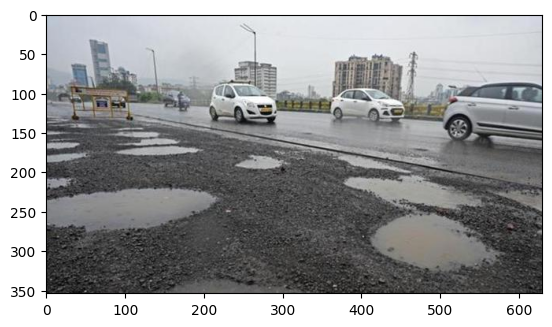

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir, image_class, image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

1.3 Load Data

In [15]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
batch_size = 32
img_height = 180
img_width = 180

In [18]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=batch_size, image_size=(img_height, img_width))

Found 694 files belonging to 4 classes.


In [19]:
buffer_size = 1000  # Adjust based on available memory and data preprocessing speed

train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)


In [20]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
train_ds = train.take(train_size).prefetch(buffer_size)
val_ds=val.take(val_size).prefetch(buffer_size)

In [21]:
class_names = ['Electricity Problem', 'Road Problem', 'Waste Problem', 'Water Problem']
print(class_names)

['Electricity Problem', 'Road Problem', 'Waste Problem', 'Water Problem']


## Visualize the data

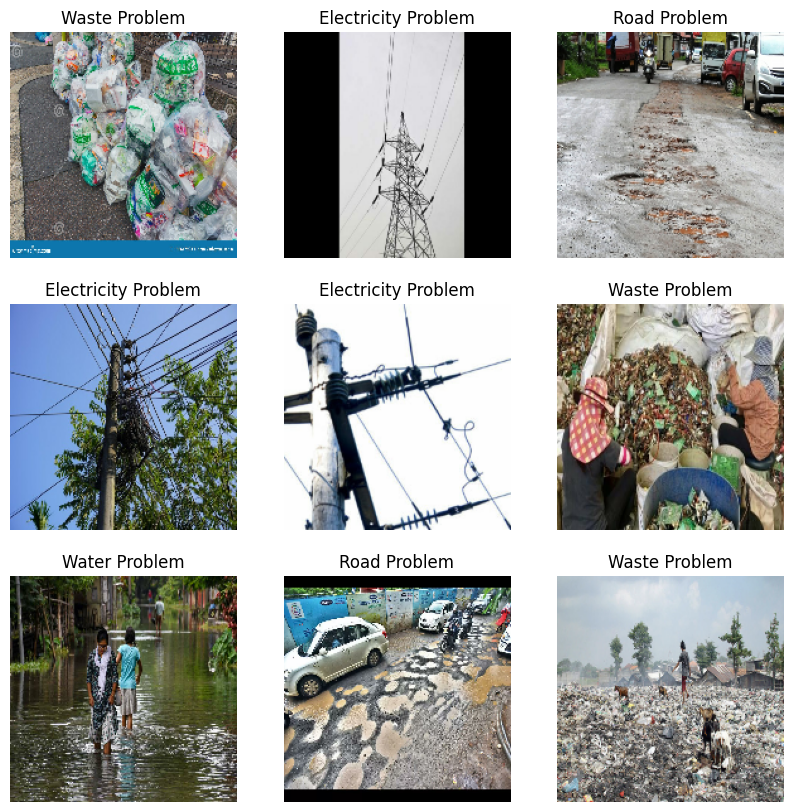

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [24]:
normalization_layer = layers.Rescaling(1./255)

## Configure the dataset for performance

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0035906888 0.9982231


## Simple CNN Model

In [27]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10




15/15 [==============================] - 7s 393ms/step - loss: 1.5108 - accuracy: 0.3000 - val_loss: 1.2500 - val_accuracy: 0.5063
Epoch 2/10
15/15 [==============================] - 2s 145ms/step - loss: 1.1635 - accuracy: 0.4854 - val_loss: 0.9179 - val_accuracy: 0.6625
Epoch 3/10
15/15 [==============================] - 2s 148ms/step - loss: 0.8750 - accuracy: 0.6396 - val_loss: 0.7687 - val_accuracy: 0.6750
Epoch 4/10
15/15 [==============================] - 2s 140ms/step - loss: 0.6801 - accuracy: 0.7354 - val_loss: 0.6519 - val_accuracy: 0.7688
Epoch 5/10
15/15 [==============================] - 2s 141ms/step - loss: 0.5053 - accuracy: 0.8146 - val_loss: 0.5309 - val_accuracy: 0.8000
Epoch 6/10
15/15 [==============================] - 2s 146ms/step - loss: 0.3680 - accuracy: 0.8562 - val_loss: 0.6526 - val_accuracy: 0.7750
Epoch 7/10
15/15 [==============================] - 2s 156ms/step - loss: 0.3188 - accuracy: 0.9062 - val_loss: 0.5704 - val_accuracy: 0.8000
Epoch 8/10
15/1

## Visualize Training Results

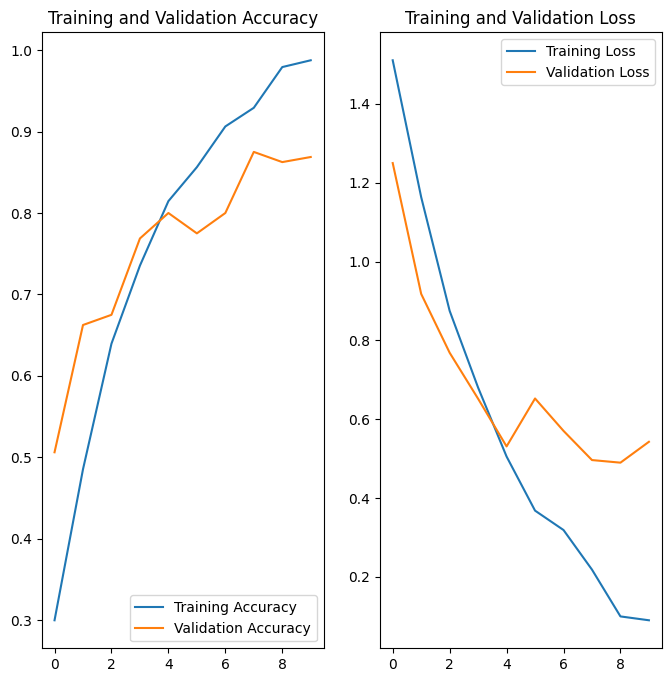

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augmentation

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

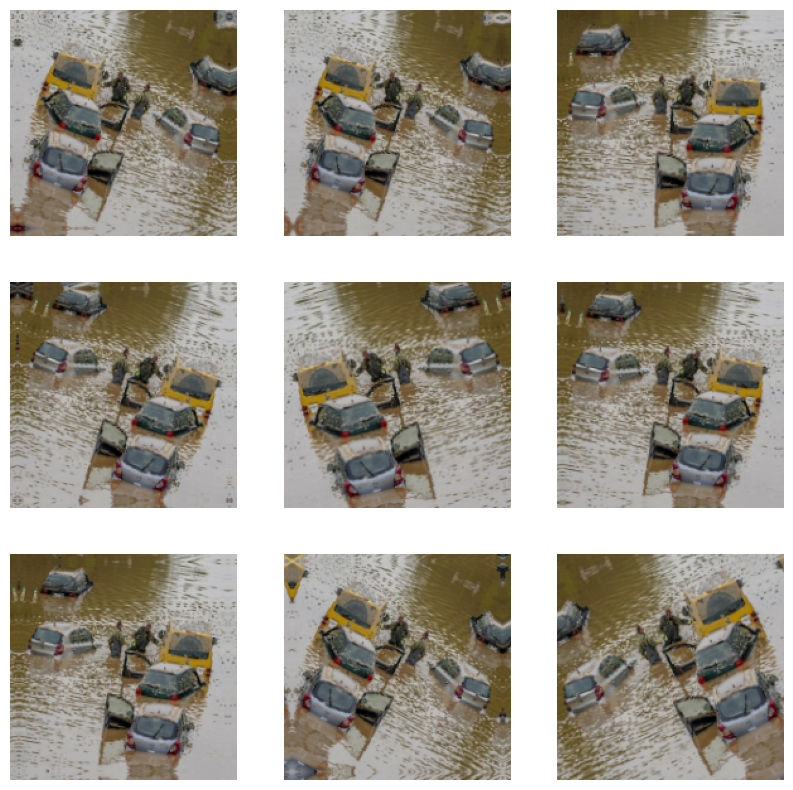

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## CNN Model with Dropout Layer

In [34]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [37]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


15/15 [==============================] - 4s 184ms/step - loss: 1.5472 - accuracy: 0.2438 - val_loss: 1.3372 - val_accuracy: 0.4750
Epoch 2/15
15/15 [==============================] - 3s 180ms/step - loss: 1.2748 - accuracy: 0.4583 - val_loss: 1.0551 - val_accuracy: 0.5375
Epoch 3/15
15/15 [==============================] - 3s 180ms/step - loss: 1.0996 - accuracy: 0.5188 - val_loss: 0.9495 - val_accuracy: 0.5875
Epoch 4/15
15/15 [==============================] - 3s 180ms/step - loss: 0.9950 - accuracy: 0.5583 - val_loss: 0.9675 - val_accuracy: 0.5813
Epoch 5/15
15/15 [==============================] - 3s 178ms/step - loss: 0.8931 - accuracy: 0.6146 - val_loss: 1.1253 - val_accuracy: 0.6313
Epoch 6/15
15/15 [==============================] - 2s 164ms/step - loss: 0.8303 - accuracy: 0.6583 - val_loss: 1.0962 - val_accuracy: 0.5875
Epoch 7/15
15/15 [==============================] - 2s 166ms/step - loss: 0.8117 - accuracy: 0.6604 - val_loss: 1.2876 - val_accuracy: 0.5750
Epoch 8/15
15/15 

## Visualize Training Results

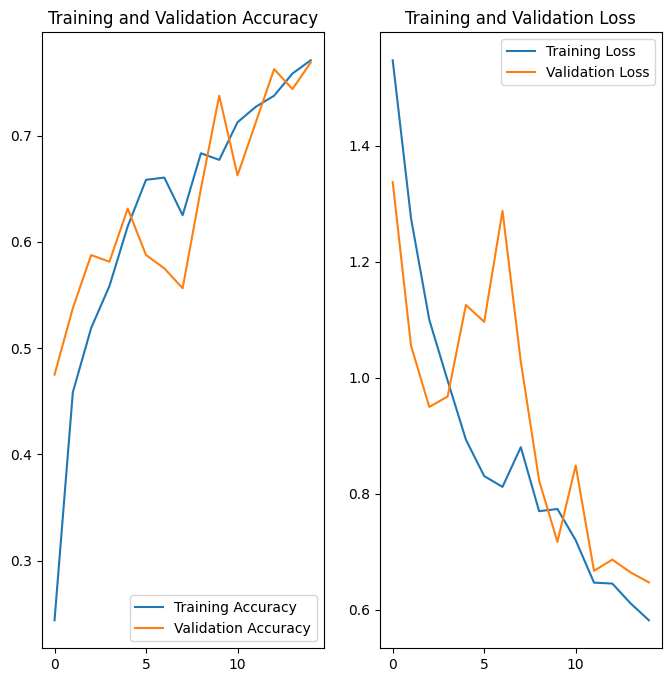

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Performance Evaluation (Testing)

In [69]:
import numpy as np
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Initialize metrics objects
pre = Precision()
re = Recall()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test data
for batch in test.as_numpy_iterator():
    X, y = batch
    predictions = model.predict(X)
    yhat = np.argmax(predictions, axis=1)  # Get the class predictions

    # Update the true labels and predicted labels lists
    true_labels.extend(y)
    predicted_labels.extend(yhat)

    # Update the precision and recall metrics
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print("F1-Score:", f1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Print the precision, recall, and accuracy metrics
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {accuracy}')


1/1 [==============================] - 0s 64ms/step
Confusion Matrix:
[[10  0  1  1]
 [ 1 16  0  0]
 [ 0  0  7  0]
 [ 5  8  0  5]]
F1-Score: 0.7111933797909408
Accuracy: 0.7037037037037037
Precision: 0.9473684430122375, Recall: 0.8571428656578064, Accuracy: 0.7037037037037037


## Predict on New Data

In [44]:
url = "https://i.guim.co.uk/img/media/dfcaf85a7bfe62ff525e3deb7113ac6d07aff651/0_0_3543_2126/master/3543.jpg?width=1200&quality=85&auto=format&fit=max&s=6f12bc4d50656543a3cc4139dbfe57b9"
path = tf.keras.utils.get_file('P1', origin=url)

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)


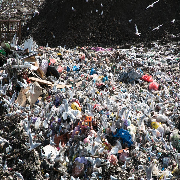

In [45]:
display(img)

In [46]:

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Waste Problem with a 99.81 percent confidence.


## Save the model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models', 'complainModel1.h5'))

c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
new_model=load_model(os.path.join('models', 'complainModel1.h5'))


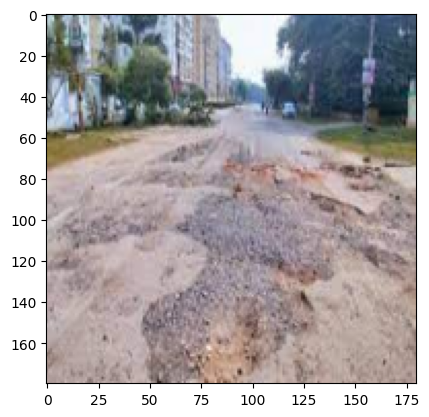

In [50]:
img=cv2.imread('imageclassification\RoadProblem_test2.jpg')

img=cv2.resize(img, (img_width, img_height))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()




In [51]:

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)

score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Road Problem with a 95.53 percent confidence.
